## <span style="color:blue">Hands-on Linear Regression using Statsmodels Library and using best fit line method-OLS(Ordinary Least Square)

Video Explanation : https://youtu.be/vDgUtsGwZ0Y

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([3,4,6,12,9,15,10,1,8,13]).reshape(-1,1)
y = np.array([16,29,43,65,51,89,57,9,53,68])

In [3]:
# we need to add the column of ones to the inputs if we want statsmodels to calculate the intercept 𝑏₀. 
# It doesn’t takes 𝑏₀ into account by default. This is just one function call:
x = sm.add_constant(X)

we know that multiple linear regression is represented as :

y = b0 + b1X1 + b2X2 + b3X3 +…..+ bnXn

but we can also, represent it as: y = b0X0 + b1X1 + b2X2 + b3X3 +…..+ bnXn where X0 = 1

We have to add one column with all the same values as 1 to represent b0X0.

In [4]:
x

array([[ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1., 12.],
       [ 1.,  9.],
       [ 1., 15.],
       [ 1., 10.],
       [ 1.,  1.],
       [ 1.,  8.],
       [ 1., 13.]])

We can see that the modified x has two columns: the first column of ones (corresponding to 𝑏₀ and replacing the intercept) as well as second column of the original feature.

In [5]:
# Create a model and fit it
model = sm.OLS(y,x)  # notice that the first argument is the output, followed with the input.

In [6]:
#Once model is created,  apply .fit() on it:
model_op = model.fit()

In [7]:
model_op

In [8]:
print("regression_intercept :",model_op.params[0])
print("regression_coeff :",model_op.params[1])

regression_intercept : 5.334568554790858
regression_coeff : 5.267337215457917


In [9]:
print("y_pred_stat :",model_op.predict(x))

y_pred_stat : [21.1365802  26.40391742 36.93859185 68.54261514 52.74060349 84.34462679
 58.00794071 10.60190577 47.47326628 73.80995236]


In [10]:
print("MSE : ",(model_op.ssr)/len(x))

MSE :  17.499947061937526


In [11]:
print("RMSE : ",np.sqrt((model_op.ssr)/len(x)))

RMSE :  4.1832938053569135


In [12]:
print("r2 :",model_op.rsquared)

r2 : 0.9676884286153296


This is the predicted response for known inputs. If we want predictions with new regressors, we can also apply .predict() with new data as the argument:

In [13]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 1)))
print(x_new)
print("y_pred_stat_new :",model_op.predict(x_new))

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
y_pred_stat_new : [ 5.33456855 10.60190577 15.86924299 21.1365802  26.40391742 31.67125463
 36.93859185 42.20592906 47.47326628 52.74060349]


## <span style="color:blue">Mathmetical intution behind the Statsmodels Library and using best fit line method-OLS(Ordinary Least Square)

The least-squares regression method is a technique commonly used in Regression Analysis. It is a mathematical method used to find the best fit line that represents the relationship between an independent and dependent variable. 

To understand the least-squares regression method lets get familiar with the concepts involved in formulating the line of best fit.

### What is the Best Fit regression Line ?

Line of best fit is drawn to represent the relationship between 2 or more variables. To be more specific, the best fit line is drawn across a scatter plot of data points in order to represent a relationship between those data points.

The least-squares method is one of the most effective ways used to draw the line of best fit. It is based on the idea that the square of the errors obtained must be minimized to the most possible extent and hence the name least squares method.

The line is as close as possible to all the scattered data points. This is what an ideal best fit line looks like.

### Calculate the Line of Best Fit

Take a look at the equation below:

y = mx + c

It is a simple equation that represents a straight line along 2 Dimensional data, i.e. x-axis and y-axis. To better understand this, let’s break down the equation:

    y: dependent variable
    m: the slope of the line
    x: independent variable
    c: y-intercept

So the aim is to calculate the values of slope, y-intercept and substitute the corresponding ‘x’ values in the equation in order to derive the value of the dependent variable.

**<span style="color:red">Calculate the slope ‘m’ and 'c' by using the following formula**

https://scholar.princeton.edu/sites/default/files/bstewart/files/lecture5handout.pdf

https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf

**<span style="color:red">Calculate best fitline slope m** 

m = Sample Covariance between X and Y / Sample Variance of X

- The higher the covariance betweenXandY,the higher the slope will be.
- Negative covariances → negative slopes; positive covariances → positive slopes

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x = np.array([3,4,6,12,9,15,10,1,8,13])
y = np.array([16,29,43,65,51,89,57,9,53,68])

In [15]:
import numpy as np
def best_fit_slope(x,y):
    m = np.sum((x - np.mean(x))* (y - np.mean(y)))/np.sum((x - np.mean(x))**2)
    return m

m = best_fit_slope(x,y)
print(m)

5.267337215457915


**<span style="color:red">Calculate y-intercept value c**

In [16]:
import numpy as np
# y = mx + c
# c = y_mean - m*x_mean
def best_fit_intercept(x,y):
    c = np.mean(y) - m * np.mean(x)
    return c

c = best_fit_intercept(x,y)
print(c)

5.334568554790891


**<span style="color:red">Substitute the values in the final equation y = mx + c**

In [17]:
y_pred = m * x + c
y_pred

array([21.1365802 , 26.40391742, 36.93859185, 68.54261514, 52.74060349,
       84.34462679, 58.00794071, 10.60190577, 47.47326628, 73.80995236])

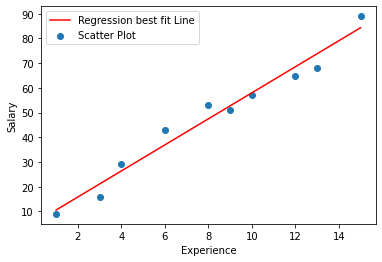

In [18]:
# Ploting Scatter Points
import matplotlib.pyplot as plt
plt.scatter(x, y, label='Scatter Plot') 
# Ploting Line
plt.plot([np.min(x), np.max(x)], [np.min(y_pred), np.max(y_pred)], color='red', label='Regression best fit Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

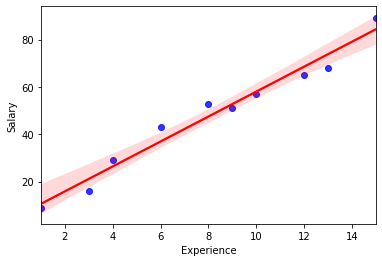

In [19]:
# Use regression plot using seaborn
import seaborn as sns
sns.regplot(y = y,x=x ,scatter_kws={"color": "blue"},line_kws={"color": "red"})
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

**<span style="color:red">Model Evaluation**

**RMSE**

It’s time to evaluate the model and see how good it is for the final stage i.e., prediction. To do that we will use the Root Mean Squared Error method that basically calculates the least-squares error and takes a root of the summed values.

Mathematically speaking, Root Mean Squared Error is nothing but the square root of the sum of all errors divided by the total number of values. This is the formula to calculate RMSE:

In [20]:
# Calculating Root Mean Squares Error
def rmse(x,y,n):
    y_pred = c + m * x
    sse = sum((y - y_pred)**2)
    rmse = np.sqrt(sse/n)
    return rmse

In [21]:
print("rmse : ",rmse(x,y,len(x)))

rmse :  4.183293805356914


**R-squared** 

- Value that measures how close the data are to the fitted line of best.
- The value of R-squared ranges between 0 and 1. A negative value denoted that the model is weak and the prediction thus made are wrong and biased. In such situations, it’s essential that you analyze all the predictor variables and look for a variable that has a high correlation with the output.

In [22]:
# Calculating R2 Score
def r_square(x,y,n):
    y_pred = c + m * x
    sst = sum((y - np.mean(y))**2)
    ssr = sum((y - y_pred)**2)
    r2 = 1 - (ssr/sst)
    return r2

In [23]:
print("R2 Score : ",r_square(x,y,len(x)))

R2 Score :  0.9676884286153296


**<span style="color:red"> Often times we will want some kind of benchmark to measure the performance of your model, typically for regression problems, we calculate the RMSE at taking slop = 0.**

In [24]:
# Lets take slope is zero
import matplotlib.pyplot as plt
starting_slope = 0
starting_intercept = float(sum(y))/len(y)  # calculating mean of y and use that mean value as intercept

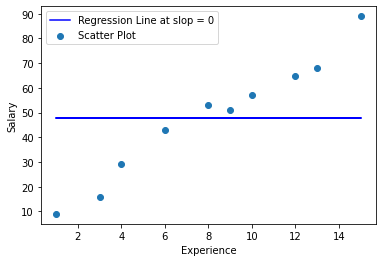

In [25]:
# Lets plot the data as well as the intercept.
plt.scatter(x,y,label='Scatter Plot')
plt.plot(x,starting_slope*x+starting_intercept, c = 'blue',label='Regression Line at slop = 0')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [26]:
# Lets write a function to calculate the root mean square error taking m(slope) = 0
def rmse(x,y):
    y_pred = starting_intercept + starting_slope * x
    error = 0
    for i,j in zip(y,y_pred):
        error += (i-j)**2
    return np.sqrt(error/len(x))

In [27]:
print("RMSE at slop =0 : ",rmse(x,y))

RMSE at slop =0 :  23.27230113246217


In [28]:
model_op.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           3.02e-07
Time:                        16:50:23   Log-Likelihood:                -28.500
No. Observations:                  10   AIC:                             61.00
Df Residuals:                       8   BIC:                             61.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3346      3.128      1.705      0.127      -1.879      12.548
x1             5.2673      0.340     15.479      0.000       4.483       6.052
==============================================================================
Omnibus:                        2.283   Durbin-Watson:                   2.400
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                0.899
Skew:                           0.169   Prob(JB):                        0.638
Kurtosis:                       1.570   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""